<a href="https://colab.research.google.com/github/KietHuynh02/EXERCISE_WEEK_4/blob/main/StepMotor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=c6823ad391b42ab7b68a94233de989833a55d1b587ebbc0f134be05fc8454716
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


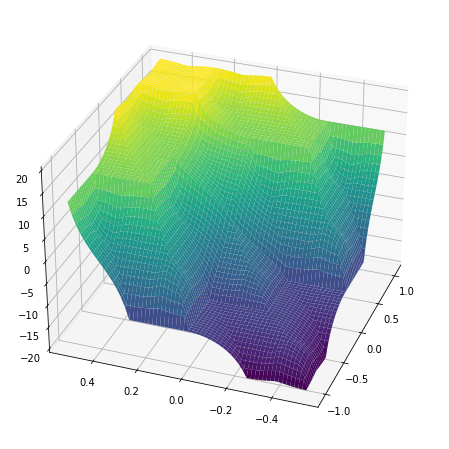

In [5]:

import numpy as np
import skfuzzy as fuzzy
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skfuzzy import control as ctrl 
universeE = np.linspace(-np.pi/3,np.pi/3,61)
universeD = np.linspace(-np.pi/6,np.pi/6,61)
universeV = np.linspace(-24,24,61)
# input
error = ctrl.Antecedent(universeE,'Error')
derror = ctrl.Antecedent(universeD, 'DError')
# output
Vo = ctrl.Consequent(universeV, 'Voltage')

names = ['VN','N','ZE','P','VP']
names1 = ['-H','-N','ZE', 'N', 'H']

error.automf(names = names)
derror.automf(names = names)
Vo.automf(names = names1)

rule = []

rule.append(ctrl.Rule(antecedent = ((error['VN']&derror['VN'])
|(error['VN']&derror['N'])|(error['N']&derror['VN'])), consequent = Vo['-H'], label = '-H'))

rule.append(ctrl.Rule(antecedent=((error['VN']&derror['ZE'])|(error['VN']&derror['P'])
|(error['N']&derror['N'])|(error['N']&derror['ZE'])|(error['ZE']&derror['VN'])|(error['ZE']&derror['N'])
|(error['P']&derror['VN'])), consequent = Vo['-N'], label = '-N'))

rule.append(ctrl.Rule(antecedent=(error['ZE']&derror['ZE']), consequent= Vo['ZE'],
label = 'ZE'))

rule.append(ctrl.Rule(antecedent=((error['VN']&derror['VP'])|(error['N']&derror['P'])
|(error['N']&derror['VP'])|(error['ZE']&derror['P'])|(error['P']&derror['N'])|(error['P']&derror['ZE'])
|(error['VP']&derror['VN'])|(error['VP']&derror['N'])), consequent = Vo['N'],
label = 'N'))

rule.append(ctrl.Rule(antecedent = ((error['ZE']&derror['VP'])|(error['P']&derror['P'])
|(error['P']&derror['VP'])|(error['VP']&derror['ZE'])|(error['VP']&derror['P'])
|(error['VP']&derror['VP'])), consequent = Vo['H'], label = 'H'))

system = ctrl.ControlSystem(rule)

sim = ctrl.ControlSystemSimulation(system, flush_after_run = 61*61+1)
upsampled = np.linspace(-np.pi/3,np.pi/3,61)
upsampled1 = np.linspace(-np.pi/6,np.pi/6,61)
x,y= np.meshgrid(upsampled, upsampled1)

z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['Error'] = x[i,j]
    sim.input['DError'] = y[i,j]
    sim.compute()
    z[i,j] = sim.output['Voltage']


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis',
linewidth = 0.4, antialiased = True)

ax.view_init(30,200)